In [1]:
## Import
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
## Load data
#df = pd.read_csv("../political_vote_classifiers/votes_scored_v2_1_utf.csv").drop(columns=["Unnamed: 0"]).rename(columns={"description":"text"})
#df = pd.read_csv("../political_vote_classifiers/votes_scored_v2_1_utf.csv").drop(columns=["Unnamed: 0"]).rename(columns={"description":"text"})
df = pd.read_pickle("../climate_classifier/scored_data/votes_data_all_expanded_politician.pkl") 
df.head(1)

,party,politician,vote,description,date,vote_id,y_pred,vote_id2
0,Siumut (SIU),Aki-Matilda Høegh-Dam,Fraværende,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['climate'] = df['y_pred'].apply(lambda x: 1 if x=="climate" else 0)
df['non-climate'] = df['y_pred'].apply(lambda x: 1 if x=="non-climate" else 0)

In [11]:
len(df[(df['description'].str.contains("covid")) & (df['y_pred']=='climate')]) ## It is only 2 meetings with 179 members in each

358

## Temporal analysis

In [12]:
quarterly = df.groupby(df['date'].dt.to_period('Q')).agg({'climate': 'sum', 'non-climate':'sum'})
quarterly['percentage_climate'] = quarterly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view = pd.DataFrame(quarterly.drop(columns=['climate', 'non-climate']))

In [13]:
view["date2"] = view.index.astype(str)
viewQ = view[(view["date2"].str.endswith("Q1"))|(view["date2"].str.endswith("Q2"))|(view["date2"].str.endswith("Q4"))].drop(columns=["date2"])
#view

In [14]:
yearly = df.groupby(df['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly['percentage_climate'] = yearly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view2 = yearly.drop(columns=['climate', 'non-climate'])

## Comment out to get from 2012 ->
view2["date2"] = view2.index.astype(int) ## wierd stuff... 2012 = 42 in this
view2 = view2[view2["date2"]>=42].drop(columns=['date2'])

C:\Users\COBOD\AppData\Local\Temp\ipykernel_7408\1701748752.py:7: FutureWarning: casting period[A-DEC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  view2["date2"] = view2.index.astype(int) ## wierd stuff... 2012 = 42 in this


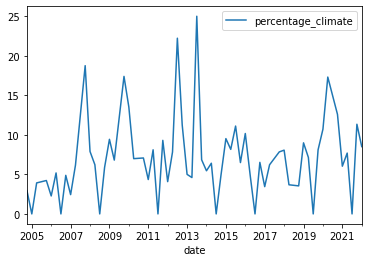

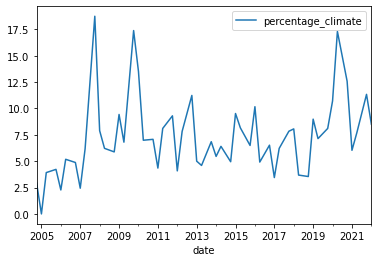

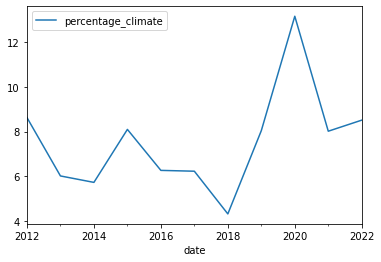

In [15]:
view.plot()
viewQ.plot()
view2.plot()
plt.show()

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#view

In [79]:

x = range(len(view2))
y = view2["percentage_climate"].values


In [80]:
y

array([ 8.62619808,  6.03825137,  5.73248408,  8.09716599,  6.26865672,
        6.23145401,  4.32569975,  8.01217039, 13.14741036,  8.09409888,
        8.5106383 ])

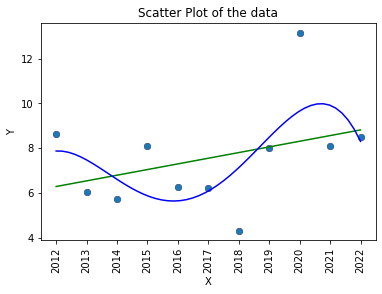

In [89]:

model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))

plt.scatter(x,y,color="red")
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")

#create scatterplot
polyline = np.linspace(0, 10, 50)
plt.scatter(x, y)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
#plt.plot(polyline, model2(polyline), color='red')
#plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
#plt.plot(polyline, model5(polyline), color='orange')
plt.xticks(x, view2.index, rotation ='vertical')
plt.show()

In [171]:
## 2012-2022
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_2012 = df[df["date"]>='2012-01-01']
#df_2012

In [172]:

yearly2 = df_2012.groupby(df_2012['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly2['percentage_climate'] = yearly2.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view2012 = pd.DataFrame(yearly2.drop(columns=['climate', 'non-climate']))
view2012

,percentage_climate
date,
2012,8.626198
2013,6.038251
2014,5.732484
2015,8.097166
2016,6.268657
2017,6.231454
2018,4.325700
2019,8.012170
2020,13.147410


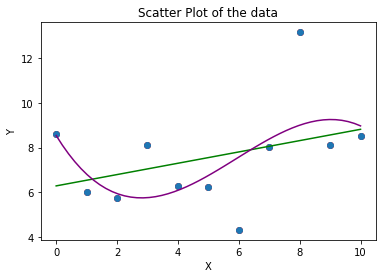

In [173]:
x = range(len(view2012))
y = view2012["percentage_climate"].values

model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))

plt.scatter(x,y,color="red")
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")

#create scatterplot
polyline = np.linspace(0, 10, 50)
plt.scatter(x, y)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
#plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
#plt.plot(polyline, model4(polyline), color='blue')
#plt.plot(polyline, model5(polyline), color='orange')
plt.show()

## Consensus and "pro"

In [18]:
df.sample(3)

,party,politician,vote,description,date,vote_id,y_pred,vote_id2,climate,non-climate
174,Alternativet (ALT),Ulla Sandbæk,For,Formålet med lovforslaget er at gøre reglerne ...,2018-12-27,"Afstemning nr. 124, 2018-19 (1. samling)",non-climate,233,0,1
121,Socialdemokratiet (S),Morten Bødskov,Fraværende,"Lovens hovedformål er at sikre, at der forelig...",2010-05-26,"Afstemning nr. 335, 2009-10",non-climate,3011,0,1
72,Socialdemokratiet (S),John Dyrby Paulsen,Fraværende,Folketingsbeslutningen sikrer Folketingets sam...,2014-12-18,"Afstemning nr. 175, 2014-15 (1. samling)",non-climate,728,0,1


In [19]:
parties_selection = ["Socialdemokratiet (S)", "Venstre (V)", "Socialistisk Folkeparti (SF)", "Det Konservative Folkeparti (KF)", "Dansk Folkeparti (DF)", "Enhedslisten (EL)"
                    ,"Det Radikale Venstre (RV)", "Alternativet (ALT)", "Liberal Alliance (LA)"]
print(len(df))
df_selection = df[df["party"].isin(parties_selection)]
df_selection
print(len(df_selection))
df_selection

969642
933876


,party,politician,vote,description,date,vote_id,y_pred,vote_id2,climate,non-climate
1,Dansk Folkeparti (DF),Alex Ahrendtsen,For,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821,0,1
2,Liberal Alliance (LA),Alex Vanopslagh,Fraværende,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821,0,1
3,Socialdemokratiet (S),Anders Kronborg,Imod,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821,0,1
4,Det Radikale Venstre (RV),Andreas Steenberg,Imod,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821,0,1
5,Socialdemokratiet (S),Ane Halsboe-Jørgensen,Fraværende,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"Afstemning nr. 320, 2021-22",non-climate,2821,0,1
...,...,...,...,...,...,...,...,...,...,...
174,Venstre (V),Ulrik Kragh,Fraværende,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"Afstemning nr. 2, 2004-05 (1. samling)",non-climate,1035,0,1
175,Dansk Folkeparti (DF),Uno Larsson,Fraværende,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"Afstemning nr. 2, 2004-05 (1. samling)",non-climate,1035,0,1
176,Socialistisk Folkeparti (SF),Villy Søvndal,For,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"Afstemning nr. 2, 2004-05 (1. samling)",non-climate,1035,0,1
177,Socialistisk Folkeparti (SF),Aage Frandsen,For,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"Afstemning nr. 2, 2004-05 (1. samling)",non-climate,1035,0,1


In [21]:
df_agree = df_selection.groupby(["party","climate"]).sum()[["For", "Neutral", "Against", "Absent"]]
df_agree

df_agree["Total"] = df_agree["For"]+df_agree["Against"]+df_agree["Neutral"]
df_agree["Agree"] = df_agree["For"]/df_agree["Total"]
df_agree["Neutrality"] = df_agree["Neutral"]/df_agree["Total"]
df_agree["Disagree"] = df_agree["Against"]/df_agree["Total"]
df_agree["Absence"] = df_agree["Absent"]/df_agree["Total"]
df_agree

KeyError: "None of [Index(['For', 'Neutral', 'Against', 'Absent'], dtype='object')] are in the [columns]"

In [93]:
df_agree_all = df_agree[["For", "Neutral", "Against", "Absent"]]
df_agree_all = df_agree_all.groupby("climate").sum()

df_agree_all["Total"] = df_agree_all["For"]+df_agree_all["Against"]+df_agree_all["Neutral"]
df_agree_all["Agree"] = df_agree_all["For"]/df_agree_all["Total"]
df_agree_all["Neutrality"] = df_agree_all["Neutral"]/df_agree_all["Total"]
df_agree_all["Disagree"] = df_agree_all["Against"]/df_agree_all["Total"]
df_agree_all["Absence"] = df_agree_all["Absent"]/df_agree_all["Total"]
df_agree_all

,For,Neutral,Against,Absent,Total,Agree,Neutrality,Disagree,Absence
climate,,,,,,,,,
0,379725,10028,142537,336452,532290,0.713380,0.018839,0.267781,0.632084
1,28246,1470,9793,25625,39509,0.714926,0.037207,0.247868,0.648586


In [94]:
df_agree[["Agree", "Neutrality", "Disagree", "Absence"]].describe()

,Agree,Neutrality,Disagree,Absence
count,18.000000,18.000000,18.000000,18.000000
mean,0.692529,0.028538,0.278934,0.662036
std,0.055835,0.022713,0.058996,0.055853
min,0.568843,0.002908,0.195703,0.586610
25%,0.675538,0.012818,0.245170,0.621360
50%,0.709121,0.023267,0.269264,0.640850
75%,0.736507,0.036601,0.303642,0.705485
max,0.753719,0.088560,0.419355,0.757654


<AxesSubplot:>

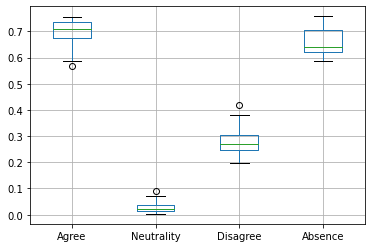

In [97]:
df_agree[["Agree", "Neutrality", "Disagree", "Absence"]].boxplot()